<a href="https://colab.research.google.com/github/yonguncho/pythonclass/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

인공지능 > 머신러닝 > 딥러닝  
머신러닝 (기계학습)

정답이 있는 입력 데이터를 모델에 투입하면 머신러닝 모델이 입력 데이터와 정답 사이의 관계를 찾는다. 따라서 새로운 데이터를 입력했을 때 모델이 파악한 관계식을 적용하여 결과를 예측할 수 있다. 또한 정답이 주어지지 않는 경우에도 스스로 데이터 속에 숨어 있는 패턴이나 규칙을 알아내는 것도 가능하다.


*   지도 학습 supervised learning 학습 과정에서 정답이 주어진다
*   비지도학습 unsupervised learning 학습 과정에서 정답이 주어지지 않는다.

회귀 regression, 분류 classification
머신러닝의 프로세스

문제 파악 > 데이터 탐색 > 전처리 > 모델 학습 > 예측

In [1]:
# 붓꽃 분류

# 필요한 모듈 읽어오기

import pandas as pd         # 분석 모듈
import numpy as np          # 계산 모듈
from sklearn import datasets    # 학습용 붓꽃 데이터 포함, sklearn: 머신러니이 분석을 할 때 유용하게 사용할 수 있는 라이브러리

iris = datasets.load_iris()



In [3]:
print(iris['DESCR'])    # 데이터 셋에 대한 설명

# 데이터셋에는 150개의 샘플이 들어 있고 각각 50개의 3개종의 데이터가 들어 있다.
# 설명 변수 4가지
#       - sepal length in cm  꽃 받침 길이
#       - sepal width in cm   꽃 받침 너비
#       - petal length in cm  꽃 잎의 길이
#       - petal width in cm   꽃 잎의 너비

# 목표 변수 3가지
#       - Iris-Setosa
#       - Iris-Versicolour
#       - Iris-Virginica


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [22]:
print("데이터셋의 크기: ", iris['target'].shape)
print("데이터셋의 내용: ", iris['target'])

데이터셋의 크기:  (150,)
데이터셋의 내용:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [23]:
print("데이터셋의 크기 : ", iris['data'].shape)
print("데이터셋의 내용 : ", iris['data'])

데이터셋의 크기 :  (150, 4)
데이터셋의 내용 :  [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4

In [24]:
# 데이터 프레임으로 전환

df = pd.DataFrame(iris['data'], columns=iris['feature_names'])  # 데이터 프레임 만들기
df.head()                                                       # 위쪽 일부만 출력

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [26]:
df.columns = ['sepal_length', 'sepal_width','petal_length', 'petal_width']
df.head() 

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
df['Target'] = iris['target']
df.tail()                       # head는 위쪽 일부만 확인  tail 끝쪽 일부만 대략 확인

,sepal_length,sepal_width,petal_length,petal_width,Target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [28]:
# step 1 데이터를 사용하여 붓꽃의 종류를 분류할수 있는 인공지능 모델을 만들자. 
print(df)

     sepal_length  sepal_width  petal_length  petal_width  Target
0             5.1          3.5           1.4          0.2       0
1             4.9          3.0           1.4          0.2       0
2             4.7          3.2           1.3          0.2       0
3             4.6          3.1           1.5          0.2       0
4             5.0          3.6           1.4          0.2       0
..            ...          ...           ...          ...     ...
145           6.7          3.0           5.2          2.3       2
146           6.3          2.5           5.0          1.9       2
147           6.5          3.0           5.2          2.0       2
148           6.2          3.4           5.4          2.3       2
149           5.9          3.0           5.1          1.8       2

[150 rows x 5 columns]


In [29]:
# step 2 데이터 탐색

# 기본정보

df.info()   # 데이터의 기본정보 보기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   Target        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [30]:
df.describe()   # 통계 정보 요약 - 평균, 표준편차,최소값 최대값 등 통계 정보 요약

,sepal_length,sepal_width,petal_length,petal_width,Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [31]:
# null 결측치 확인 - 데이터 분석이나 머신러닝에서는 결측치의 처리가 상당히 중요하다. 
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Target          0
dtype: int64

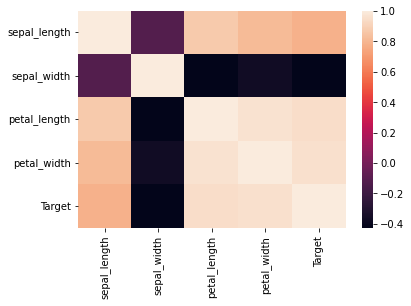

In [44]:
# 시각화 - 데이터를 숫자로만 봤을때와는 다른 시각을 갖을 수 있다. 
# 파이썬에서는 matplotlib 와 seaborn 을 사용하여 데이터를 시각화 할수 있다. 
# corr() 상관계수
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(data=df.corr())
plt.show()

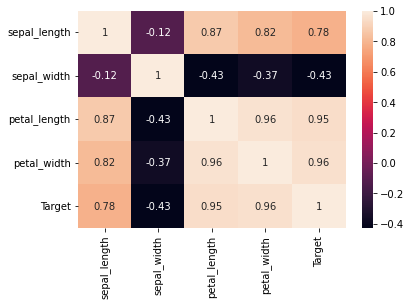

In [43]:
sns.heatmap(data=df.corr(),annot=True)
plt.show()

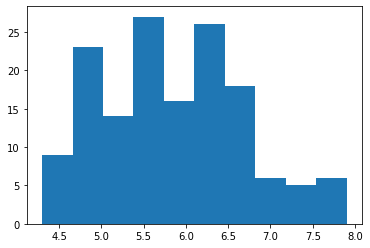

In [46]:
plt.hist(x='sepal_length', data=df)
plt.show()

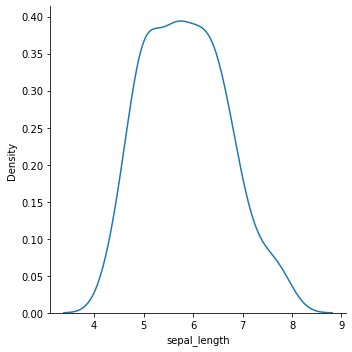

In [47]:
sns.displot(x='sepal_length', kind='kde', data=df)

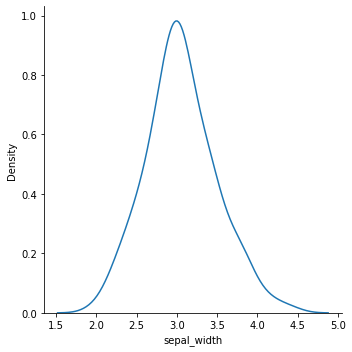

In [48]:
sns.displot(x='sepal_width', kind='kde', data=df)

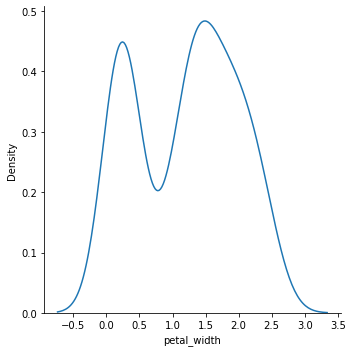

In [49]:
sns.displot(x='petal_width', kind='kde', data=df)

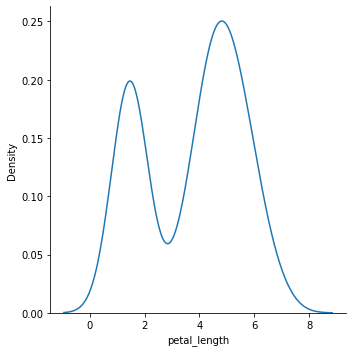

In [50]:
sns.displot(x='petal_length', kind='kde', data=df)

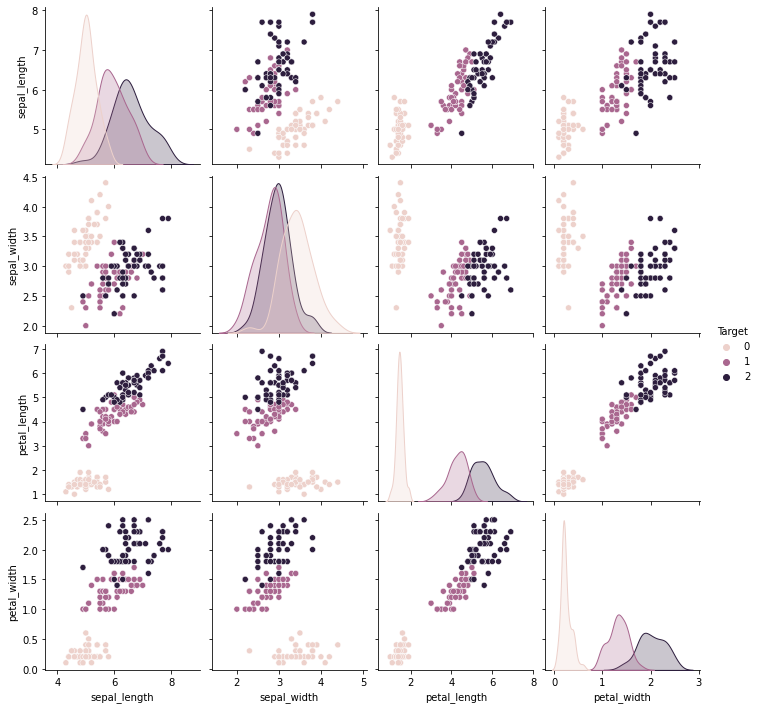

In [51]:
sns.pairplot(df, hue='Target')

In [40]:
# 전처리

# 원래 전처리 과정(결측치 처리, 이상치 처리) 은 가장 비중이 크고 다양하다. 오늘은 전처리는 간단히 살펴보고 모델학습에 비중을 늘리도록 한다. 

# 훈련용과 검증용 데이터셋 분할

from sklearn.model_selection import train_test_split
# 여기서 X는 대문자로 y는 소문자로 표현 했다는 점에 유의하자 

X_data = df.loc[:,'petal_length':'petal_width']  #문제지 추출
y_data = df.loc[:,'Target']                      #답안지 추출

# X_train 훈련용 문제지, X_test 훈련용 답안지, y_train 검증용 문제지, y_test 검증용 답안지
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, shuffle=True, random_state=20)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(120, 2) (120,)
(30, 2) (30,)


In [41]:
# step 3 모델 학습

# KNN (K-Nearest-Neighbors) K근접이웃 algorithm

# 예측(분류)하려는 데이터 X가 주어졌을 때 기존 데이터 중 속성이 비슷한 K개의 이웃을 찾는다. 
# 데이터 X의 가까운 주변을 둘러싼 K개가 많이 속해 있는 목표 클래스를 예측값으로 결정하게 된다. 

# 가까운 이웃을 3으로 설정 할때는 삼각형 클래스에 속하는 데이터가 2개로 가장 많고
# 가까운 이웃을 5개로 설정 할때는 사각형 클래스에 속하는 데이터가 3개로 가장 많게 된다. 
# 따라서 K값에 따라 KNN모델이 예측하는 클래스가 달라질 수 있다. 

from sklearn.neighbors import KNeighborsClassifier # KNN모듈 가져오기
knn = KNeighborsClassifier(n_neighbors= 1)         # 객체 생성하면서 K값 설정
knn.fit(X_train, y_train)                          # 훈련용 문제와 답안지 

y_knn_pred = knn.predict(X_test)                   # 검증용 문제지만 제공

from sklearn.metrics import accuracy_score         # 채점 모듈
knn_acc = accuracy_score(y_test, y_knn_pred)       # 실제 답안지와 비교
 
print(knn_acc)                                     # 비교 결과 정확도

# k = 3    0.9333333333333333
# k = 5    0.9333333333333333
# k = 20   0.9666666666666667
# k = 50   0.9333333333333333

0.9333333333333333


In [39]:
# Decision Tree 의사결정나무 algorithm

# 의사 결정 나무 모델은 이진 트리 알고리즘을 사용한다. 트리의 각 분기점에는 데이터 셋의
# 속성 값을 하나씩 위치 시킨다. 임의의 조건을 스스로 설정하여 계속 2개의 줄기로 가지를 나누면서
# 데이터를 구분한다. 이 때 각 분기점에서 분류가 가장 잘되는 최적의 기준을 찾는 과정이 중요하다. 

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=1, random_state = 0)
dtc.fit(X_train, y_train)

y_dtc_pred = dtc.predict(X_test)   

from sklearn.metrics import accuracy_score         # 채점 모듈
dtc_acc = accuracy_score(y_test, y_dtc_pred)       # 실제 답안지와 비교
 
print(dtc_acc)   

# max_depth=1 0.6333333333333333
# max_depth=3 0.9333333333333333

0.6333333333333333


In [35]:
# SVM (Support Vector Machine)
# 좌표 평면에 데이터들을 각각의 점으로 표시하고 각 데이터가 속하는 클래스 별로 군집을 
# 이룬다 라고 가정한다.
# 각 군집 간의 거리를 최대한 멀리 유지하는 경계선을 찾는다.
# 이렇게 각 군집을 서로 확연하게 구분지을 수 있다.
# 새로운 데이터가 주어 졌을 때 공간의 좌표에서 어느 군집에 속하는지 분류할 수 있게 된다.

from sklearn.svm import SVC                                     # 모듈 가져오기
svc = SVC(kernel="rbf")                                         # rbf - Rdial Basis Function
svc.fit(X_train, y_train)

y_svc_pred = svc.predict(X_test)

from sklearn.metrics import accuracy_score                      # 채점 모듈
svc_acc = accuracy_score(y_test, y_svc_pred)                    # 실제 답안지와 비교

print(svc_acc)



0.9333333333333333


In [36]:
# Ensemble - Voting

# 여러 모델을 결합하여 성능을 높이는 방법
# 하나의 모델에만 의존하는 것보다 여러 모델의 예측을 결합하여 최종 예측값을 결정하게 된다.

# 그 중 Voting은 여러 개의 모델이 예측한 값을 종합하여 최종 예측 값을 결정하게 되는데
# 모델들이 예측한 값 중에서 다수결로 최종 분류 클래스를 정하게 된다
# voting의 옵션 hard와 soft가 있는데 'hard'를 늘 사용하면 되고 모델들이 예측한 값 중에서 
# 다수결과 최종 분류 클래스를 정하고 'soft' 각 모델의 분류 클래스 별로 예측 확률을 평균하여 
# 최종 클래스를 결정한다

In [53]:
from sklearn.ensemble import VotingClassifier
hvc = VotingClassifier(estimators=[('KNN', knn), ('SVM', svc), ('DT', dtc)], voting='hard')

hvc.fit(X_train, y_train)

y_hvc_pred = hvc.predict(X_test)

hvc_acc = accuracy_score(y_test, y_hvc_pred)
print(hvc_acc)



0.9333333333333333


In [58]:
# Step 5 예측

# knn
knntest = knn.predict([[9.5, 5.4]])
print(knntest)
# dtc
dtctest = dtc.predict([[9.5, 5.4]])
print(dtctest)
# svc
svctest = svc.predict([[9.5, 5.4]])
print(svctest)

# hvc
hvctest = hvc.predict([[9.5, 5.4]])
print(hvctest)

#                - Iris-Setosa        0
#                - Iris-Versicolour   1
#                - Iris-Virginica     2

[2]
[1]
[2]
[2]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Decision

In [61]:
#https://dacon.io/

#https://dacon.io/competitions/open/235539/overview/description
#타이타닉 생존 예측 경진대회

#zip 파일 다운 받은 후 3개 파일(submission, test, train) csv 파일을 colab file에 업로드

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('submission.csv')


In [62]:
train.shape

(891, 12)

In [63]:
test.shape

(418, 11)

In [65]:
submission.shape

(418, 2)

In [67]:
train.head()

# survived - 생존자 여부 0 사망 1 생존
# Pclass   - 등급 1 상 3 하
# Name     - 성과 이름 뿐만이 아니라 사회적 지위까지 포함되어 있다
# Sex      - male 남성과 female 여성으로 구분된다. 글자로된 데이터는 숫자로 바꾸어 학습을 시켜야만 된다
# Age      - 나이는 단계가 상당히 많기 때문에 카테고리화 시키는 것도 좋은 방법이다
# Fare     - 요금도 생존에 많은 영향을 미치는 것을 추후 확인할 수 있다.

# 데이터를 학습 시키기 전에 다양한 방식의 전처리 과정이 아주 중요하다


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [71]:
test.head()

# test 셋에는 생존 여부가 없다. 생존 여부를 예측하여 제출하는 것이 관건이다

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [74]:
train.describe()

# describe() 요약 통계 정보를 제공한다. 따라서 숫자 데이터만 가능하다

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


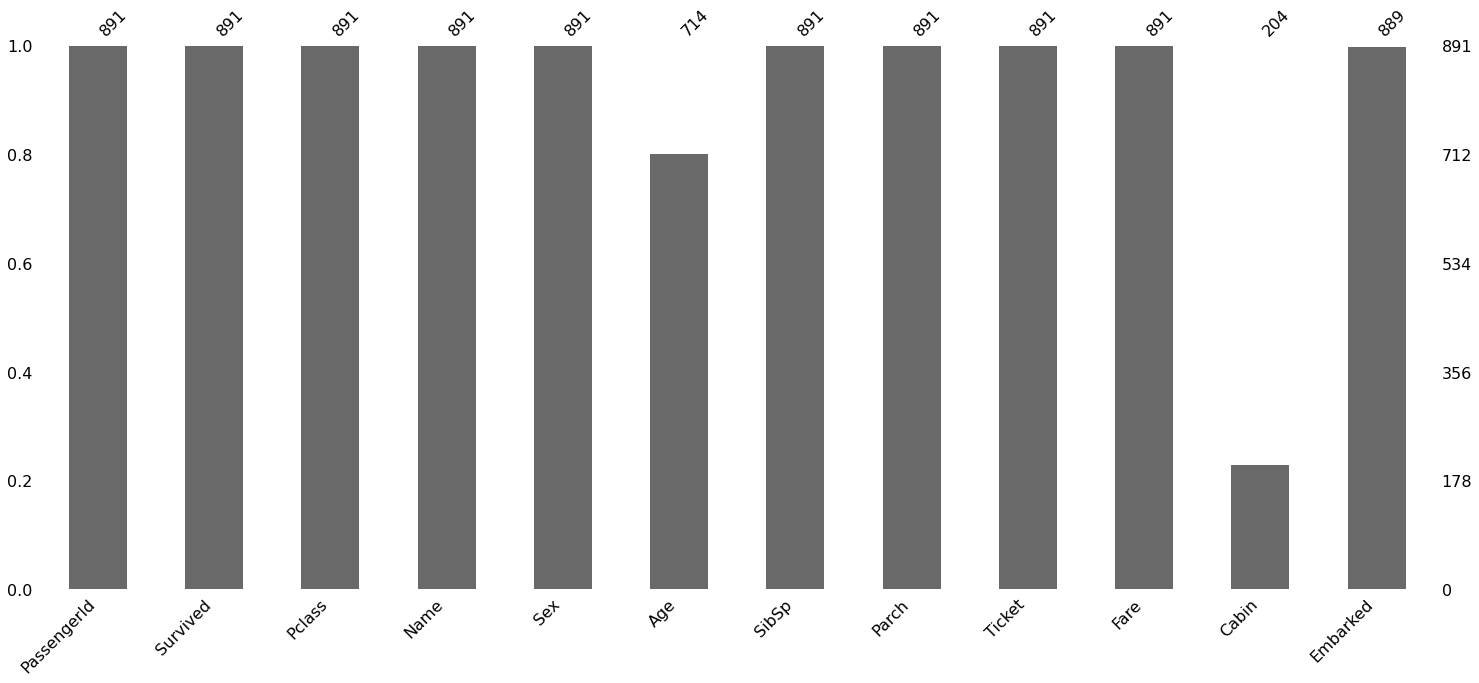

In [75]:
# 결측치 확인

import missingno as msno
msno.bar(train)

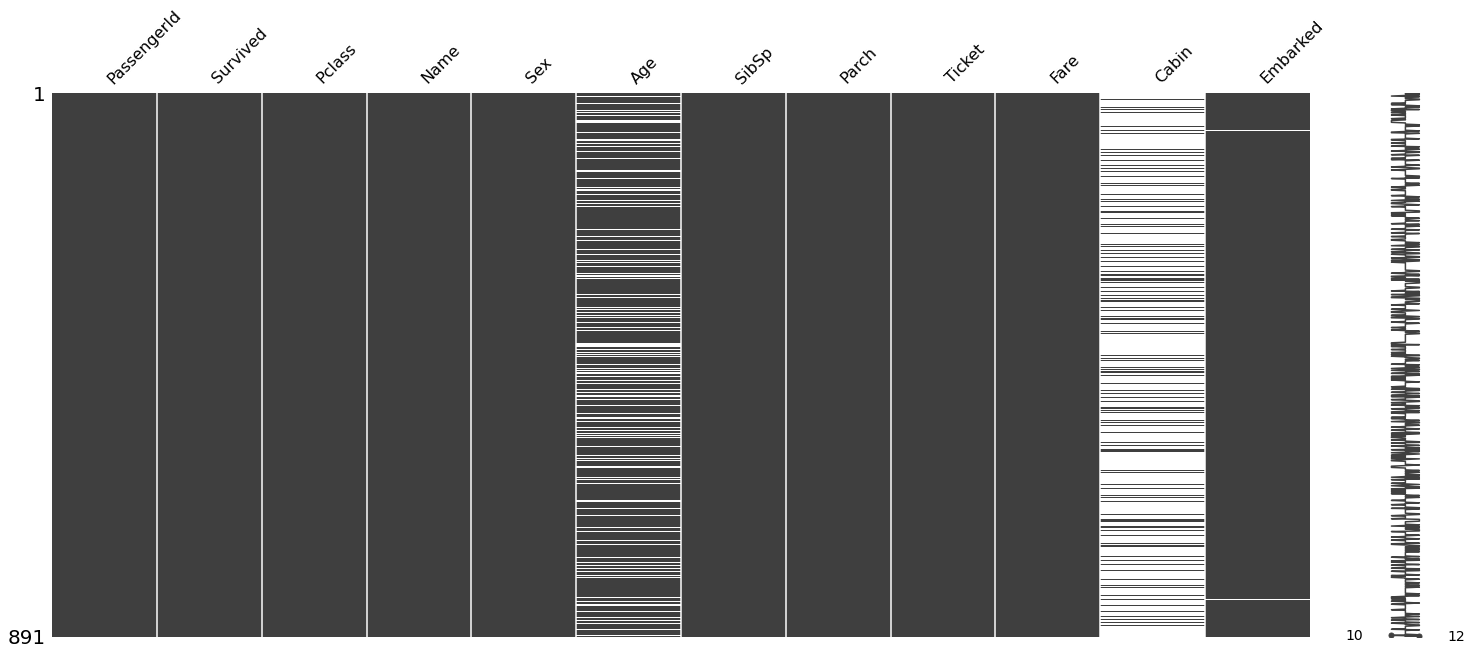

In [76]:
msno.matrix(train)

In [78]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


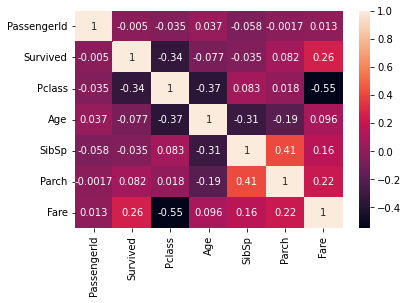

In [80]:
import seaborn as sns
sns.heatmap(train.corr(), annot=True)

In [82]:
train['TrainSplit'] = 'Train' 
test['TrainSplit'] = 'Test'

In [86]:
data = pd.concat([train, test], axis=0)

In [88]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [94]:
data_num = data.loc[:,['Pclass','Age','SibSp','Parch','Fare','Survived']]
data_num

,Pclass,Age,SibSp,Parch,Fare,Survived
0,3,22.0,1,0,7.2500,0.0
1,1,38.0,1,0,71.2833,1.0
2,3,26.0,0,0,7.9250,1.0
3,1,35.0,1,0,53.1000,1.0
4,3,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...
413,3,NaN,0,0,8.0500,NaN
414,1,39.0,0,0,108.9000,NaN
415,3,38.5,0,0,7.2500,NaN
416,3,NaN,0,0,8.0500,NaN


In [99]:
# 결측치 처리
# 나이
data_num['Age'] = data_num['Age'].fillna(data_num['Age'].mean())   # 결측 값들을 나이 전체의 평균값으로 채운다.


In [106]:
# 요금

data_num['Fare'] = data_num['Fare'].fillna(data_num['Fare'].mode()[0])    # 결측 값들을 요금의 최대빈도 값으로 채운다

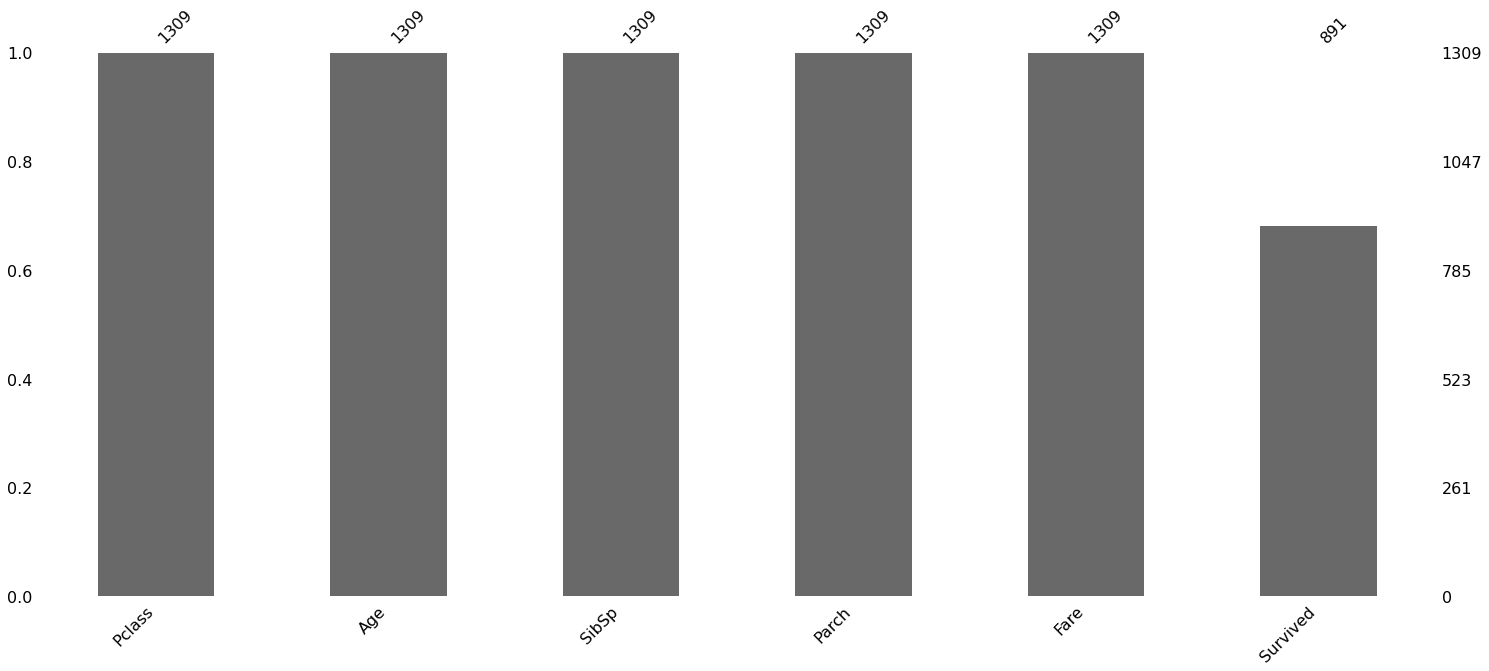

In [107]:
msno.bar(data_num)

In [108]:
# 최종 결측값 확인

data_num.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Survived    418
dtype: int64

In [184]:
# 학습용 데이터와 검증용 데이터로 구분

X_train = data_num.loc[data['TrainSplit']=='Train',['Pclass','Age','SibSp','Parch','Fare']]
y_train = data_num.loc[data['TrainSplit']=='Train', 'Survived']

X_test = data_num.loc[data['TrainSplit']=='Test', ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]


In [185]:
# 학습 데이터를 훈련용 80% 검증용 20%로 분할하자

from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.2, shuffle=True, random_state=1)

In [188]:
# DT

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=10, random_state = 0)
dtc.fit(X_tr, y_tr)

y_dtc_pred = dtc.predict(X_val)   

from sklearn.metrics import accuracy_score         # 채점 모듈
dtc_acc = accuracy_score(y_val, y_dtc_pred)       # 실제 답안지와 비교
 
print(dtc_acc) 
  

ValueError: ignored

In [137]:
y_test_pred = dtc.predict(X_test)

In [138]:
# submission 에 정리
submission['Survived'] = y_test_pred

In [125]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [140]:
# 제출용 파일 만들기
submission.to_csv('submission1st.csv', index=False)

In [141]:
# 정확도를 올리는 방법
# 1. 알고리즘을 변경
# 2. 파라미터를 조정
# 3. 피처 엔지니어링 (문자데이터를 수치화, 값을 평탄화(스케일링)...)

# 모델 성능을 개선할 수 있는 다양한 방법들이 존재한다
# 1. 레이블 인코딩 (문자를 -> 숫자로)
# 2.  원-핫 인코딩 (문자를 -> 숫자로)

In [144]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

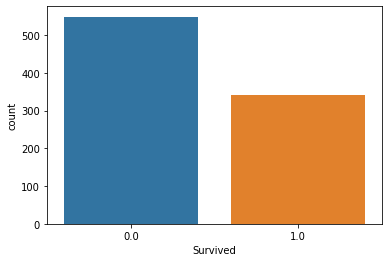

In [147]:
sns.countplot(x='Survived', data=data[data['TrainSplit']=='Train'])

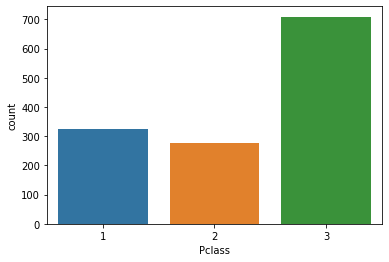

In [149]:
sns.countplot(x='Pclass', data=data)

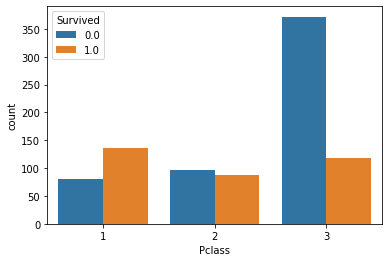

In [152]:
sns.countplot(x='Pclass', data=data, hue='Survived')

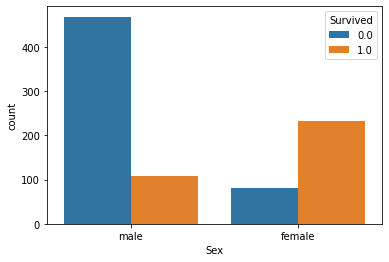

In [154]:
sns.countplot(x='Sex', data=data, hue='Survived')

In [156]:
# 성을 추가하여 다시 분석해 보자
data_num = data.loc[:,['Sex','Pclass','Age','SibSp','Parch','Fare','Survived']]
data_num

,Sex,Pclass,Age,SibSp,Parch,Fare,Survived
0,male,3,22.0,1,0,7.2500,0.0
1,female,1,38.0,1,0,71.2833,1.0
2,female,3,26.0,0,0,7.9250,1.0
3,female,1,35.0,1,0,53.1000,1.0
4,male,3,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...
413,male,3,NaN,0,0,8.0500,NaN
414,female,1,39.0,0,0,108.9000,NaN
415,male,3,38.5,0,0,7.2500,NaN
416,male,3,NaN,0,0,8.0500,NaN


In [163]:
#문자를 인식하지 못하니까 Sex의 결과를 숫자로 변경

data_num.loc[data_num['Sex']=='female','Sex'] = 0
data_num.loc[data_num['Sex']=='male','Sex'] = 1
data_num

,Sex,Pclass,Age,SibSp,Parch,Fare,Survived
0,1,3,22.0,1,0,7.2500,0.0
1,0,1,38.0,1,0,71.2833,1.0
2,0,3,26.0,0,0,7.9250,1.0
3,0,1,35.0,1,0,53.1000,1.0
4,1,3,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...
413,1,3,NaN,0,0,8.0500,NaN
414,0,1,39.0,0,0,108.9000,NaN
415,1,3,38.5,0,0,7.2500,NaN
416,1,3,NaN,0,0,8.0500,NaN


In [160]:
data_num.corr()  

#성이 출력 되지 않는다. 왜? 

,Pclass,Age,SibSp,Parch,Fare,Survived
Pclass,1.000000,-0.408106,0.060832,0.018322,-0.558629,-0.338481
Age,-0.408106,1.000000,-0.243699,-0.150917,0.178740,-0.077221
SibSp,0.060832,-0.243699,1.000000,0.373587,0.160238,-0.035322
Parch,0.018322,-0.150917,0.373587,1.000000,0.221539,0.081629
Fare,-0.558629,0.178740,0.160238,0.221539,1.000000,0.257307
Survived,-0.338481,-0.077221,-0.035322,0.081629,0.257307,1.000000


In [164]:
data_num.info()      #Sex가 object로 잡힌 것을 확인 할 수 있다. 이것은 기본적으로 str을 의미한다.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       1309 non-null   object 
 1   Pclass    1309 non-null   int64  
 2   Age       1046 non-null   float64
 3   SibSp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Fare      1308 non-null   float64
 6   Survived  891 non-null    float64
dtypes: float64(3), int64(3), object(1)
memory usage: 114.1+ KB


In [167]:
data_num['Sex'] = data_num['Sex'].astype(int)      # 형 변환
data_num.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Age       1046 non-null   float64
 3   SibSp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Fare      1308 non-null   float64
 6   Survived  891 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 114.1 KB


In [189]:
data_num.corr()      # 그럼 Sex까지 출력 되는 것을 출력 되는 것을 확인할 수 있다

,Sex,Pclass,Age,SibSp,Parch,Fare,Survived
Sex,1.000000,0.124617,0.063645,-0.109609,-0.213125,-0.185523,-0.543351
Pclass,0.124617,1.000000,-0.408106,0.060832,0.018322,-0.558629,-0.338481
Age,0.063645,-0.408106,1.000000,-0.243699,-0.150917,0.178740,-0.077221
SibSp,-0.109609,0.060832,-0.243699,1.000000,0.373587,0.160238,-0.035322
Parch,-0.213125,0.018322,-0.150917,0.373587,1.000000,0.221539,0.081629
Fare,-0.185523,-0.558629,0.178740,0.160238,0.221539,1.000000,0.257307
Survived,-0.543351,-0.338481,-0.077221,-0.035322,0.081629,0.257307,1.000000


In [190]:
# 원핫 인코딩

# 문자열 데이터를 숫자 데이터로 변환하는 방법, 하나의 열을 범주(피처) 개수 만큼의 열로 분할하여
# 해당하는 열에는 1을 입력하고 나머지에는 0을 입력하여 그 차이를 일정하게 유지시킬 수 있게 된다

df

,sepal_length,sepal_width,petal_length,petal_width,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [196]:
#train.head()

onehot_prefix = []

for col in ['Ticket', 'Cabin', 'Embarked']:
    train[col] = train[col].astype('category')
    train = pd.get_dummies(train, columns=[col], prefix=col[:3], drop_first=True)
    onehot_prefix.append(col[:3])

KeyError: ignored

In [198]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,TrainSplit,...,Cab_F G63,Cab_F G73,Cab_F2,Cab_F33,Cab_F38,Cab_F4,Cab_G6,Cab_T,Emb_Q,Emb_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,Train,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,Train,...,0,0,0,0,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,Train,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,Train,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,Train,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,Train,...,0,0,0,0,0,0,0,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,Train,...,0,0,0,0,0,0,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,Train,...,0,0,0,0,0,0,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,Train,...,0,0,0,0,0,0,0,0,0,0


In [ ]:

onehot 과 XGBoost 같이 써서 점수 올려보기